In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [29]:
# parameter setting
amp = 2          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz, 얼마나 정보를 촘촘하게
dur = 0.5        # in seconds, 얼마나 정보를 길게
freq = 400.0     # sine frequency, Hz, 사인 웨이브가 1초에 몇번 왔다갔다 하게 할것인가. sr과 유닛은 Hz로 같지만 완전다른것임에 주의

In [32]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [33]:
# generate phase
theta = t * 2*np.pi * freq

In [34]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)
#np앞에 1이 곱해져있다고 생각하면 그냥 본래의 -1, 1까지의 기본 sin그래프겠지.
#-2부터 2까지인 그래프로 만드려면 2곱하면 되겠지. 위 Parameter setting의 amp값을 2로 바꾸기.

Text(0, 0.5, 'real')

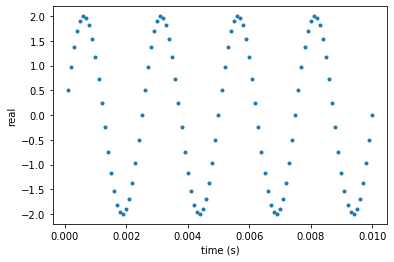

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [37]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

<IPython.core.display.Javascript object>


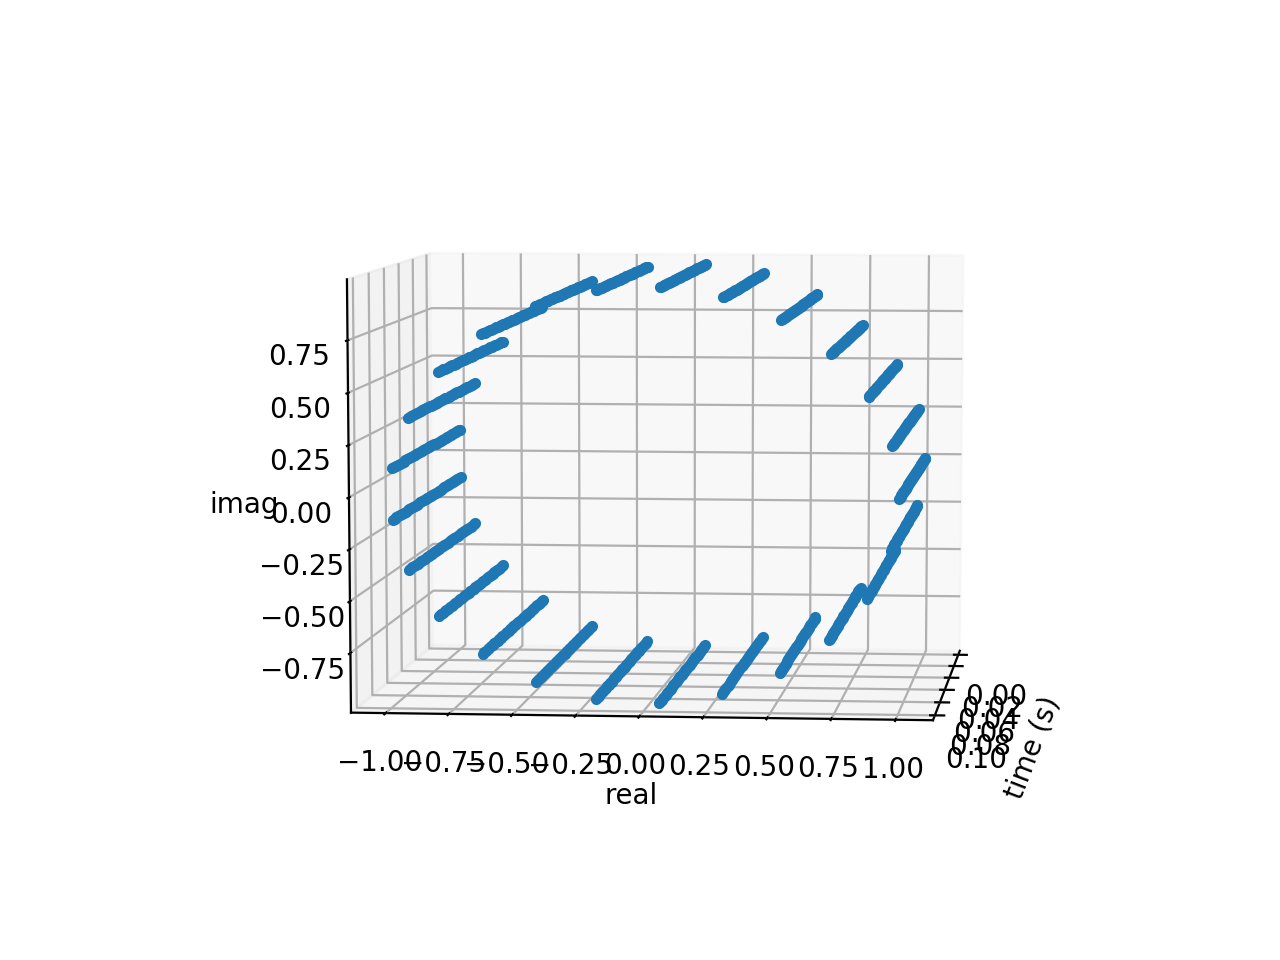

Text(0.5, 0, 'imag')

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [10]:
ipd.Audio(s, rate=sr)

In [16]:
#라이브러리 없을때 다운받는법
#!pip install sounddevice
import sounddevice as sd
sd.play(c.real,sr)
#위에 ipd.Audio이런걸로 소리 안나는 사람은 이걸로 하면 날수도 있엉

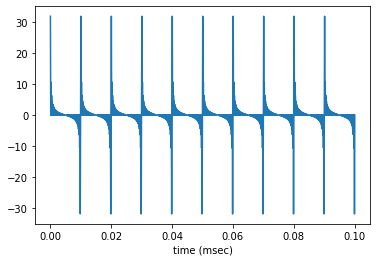

In [8]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

# Generate pulse train

In [ ]:
#sampling rate과 frequency의 관계

<IPython.core.display.Javascript object>


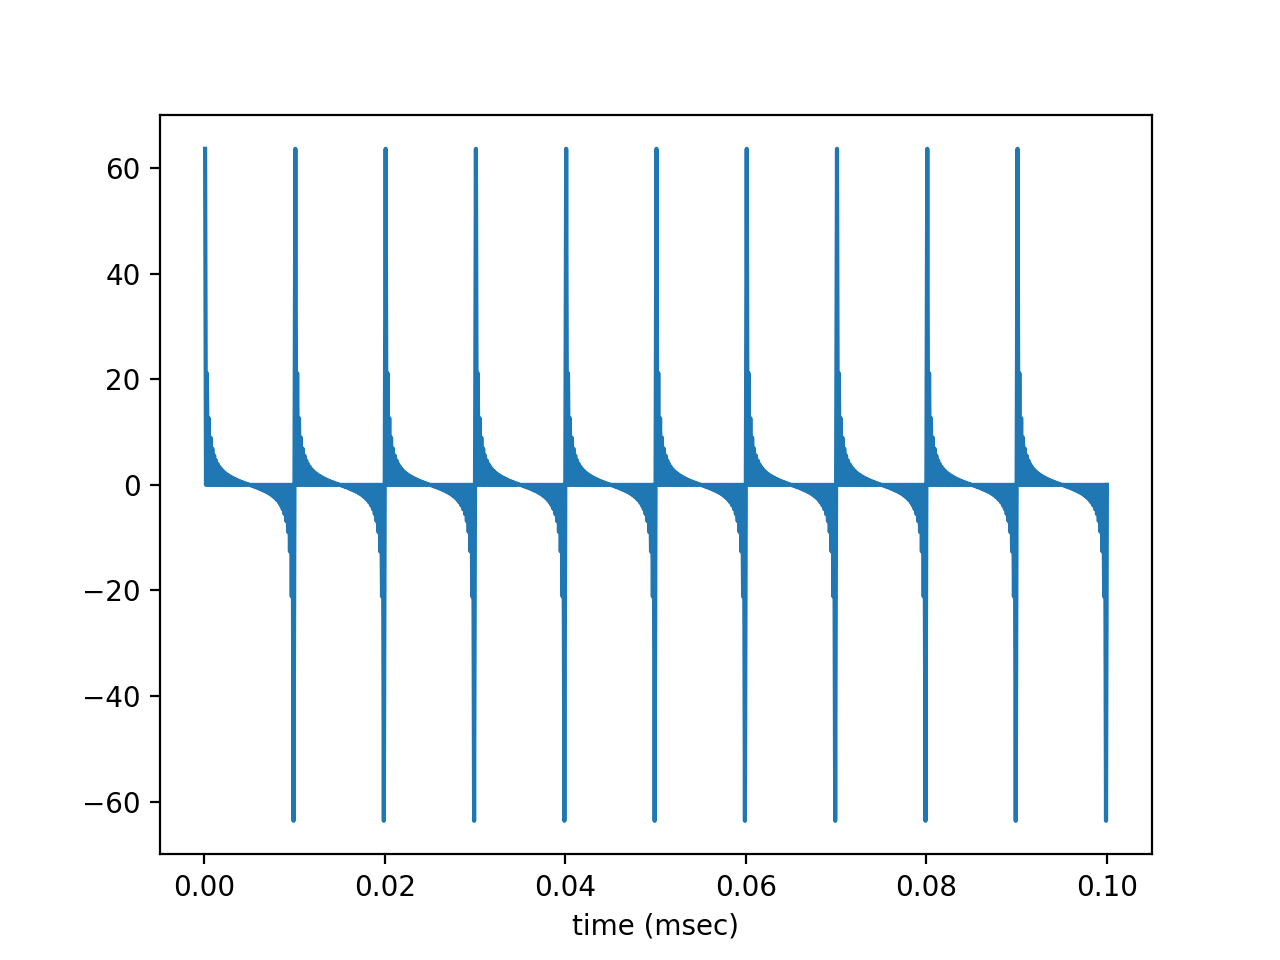

In [43]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t)) #time vector의 개수만큼 0을 만들어줌;
for freq in range(F0, Fend+1, F0): #맨 마지막이 increment. 100씩 늘어남. Fend+1한 이유는 맨마지막도 표현시키기 위해서.
                                   #그럼 100부터 5000까지 몇번의 루프가 돌까? 약 50번.
    theta = t * 2*np.pi * freq #sin의 입력이 되는 theta
    s = s + amp * np.sin(theta)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)
#F0=제일 낮은 시작 frequency. 끝은? Sr의 반까지라고 했지? Fend = sr/2 = Nyquist frequency.
#왜 pulse train이라고 할까?

In [ ]:
#점점 더 사람 목소리에 가까워지게 만들거야 제일 마지막엔 스팩트로그램.